<h1><span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Echauffement-d'une-barre-en-contact-avec-une-source-chaude" data-toc-modified-id="Echauffement-d'une-barre-en-contact-avec-une-source-chaude-1">Echauffement d'une barre en contact avec une source chaude</a></span><ul class="toc-item"><li><span><a href="#Etude-théorique" data-toc-modified-id="Etude-théorique-1.1">Etude théorique</a></span></li><li><span><a href="#Etude-numérique" data-toc-modified-id="Etude-numérique-1.2">Etude numérique</a></span><ul class="toc-item"><li><span><a href="#Modélisation" data-toc-modified-id="Modélisation-1.2.1">Modélisation</a></span></li><li><span><a href="#Initialisation" data-toc-modified-id="Initialisation-1.2.2">Initialisation</a></span></li><li><span><a href="#Itérations" data-toc-modified-id="Itérations-1.2.3">Itérations</a></span></li></ul></li><li><span><a href="#Pour-aller-plus-loin" data-toc-modified-id="Pour-aller-plus-loin-1.3">Pour aller plus loin</a></span><ul class="toc-item"><li><span><a href="#Puissance-volumique-interne-dans-tout-le-conducteur" data-toc-modified-id="Puissance-volumique-interne-dans-tout-le-conducteur-1.3.1">Puissance volumique interne dans tout le conducteur</a></span></li><li><span><a href="#Puissance-volumique-interne-dans-une-zone-du-conducteur" data-toc-modified-id="Puissance-volumique-interne-dans-une-zone-du-conducteur-1.3.2">Puissance volumique interne dans une zone du conducteur</a></span></li></ul></li><li><span><a href="#Bibliographie" data-toc-modified-id="Bibliographie-1.4">Bibliographie</a></span></li></ul></li></ul></div>

# Echauffement d'une barre en contact avec une source chaude


On s'intéresse ici à une barre métallique cylindrique dont la surface latérale est calorifugée. L'extrémité droite de la barre est en contact, supposé parfait, avec l'air de température $T_d = 20°C$. Avant le début de l'expérience, toute la barre est à l'équilibre thermique à la température $T_d$. 

A l'instant initial, on place l'extrémité gauche de la barre en contact d'une source de chaleur de température $T_g=40°C$. Ce contact est supposé parfait.

*L'objectif de cet exercice est de déterminer l'évolution de la température au sein de la barre au cours du temps.*


## Etude théorique

On appelle désormais $L=0.5m$ la longueur de la barre.

> **Question 1**
>
> Faire un schéma de la situation (on appellera $(Ox)$ l'axe dirigeant la barre) et établir l'équation aux dérivées partielles vérifiées par la température dans la barre. Au bout de combien de temps, en ordre de grandeur, peut-on considérer que le régime permanent est atteint au sein de la barre ? Déterminer alors le champ de température en régime permanent dans la barre.


## Etude numérique

### Modélisation

Nous allons dans la suite déterminer la température $T(x,t)$ :
* en tout point de la barre
* à tout instant de l'expérience considérée.

Pour cela, nous allons découper la barre en tronçons de longueur $dx=1cm$.
L'étude sera menée sur une durée de $\Delta t = 45min$, avec un pas temporel de $dt=0.01s$.

La fonction $T(x,t)$ sera donc approximée par un tableau ```T[i,j]``` de telle sorte que :
$T[i,j]\simeq T(x=j\times dx,t=i\times dt)$.

Autrement dit, chaque ligne du tableau correspond à un instant de l'expérience (la ligne ```i=0``` correspondant à l'instant initial). Au sein d'une ligne, on parcourt la barre de gauche (```j=0```) à droite en incrémentant ```j```.

Le tableau utilisé est de type ```numpy.array```. On aura de plus besoin du module ```matplotlib.pyplot``` pour effectuer les représentations graphiques du champ de température.

>**Question 2**
>
> Importer les modules nécessaires à l'étude.

In [1]:
import numpy as np
import matplotlib.pyplot as plt

### Initialisation

On nommera désormais les variables entières ```Nt``` et ```Nx``` correspondant respectivement au nombre de lignes du tableau ```T``` et au nombre de colonnes.

>**Question 3**
>
>Définir ```Nx``` et ```Nt``` sur Python et créer le tableau ```T``` de bonnes dimensions, rempli pour le moment avec des 0 dans chaque case. Créer également les listes ```x``` et ```t``` correspondant respectivement aux valeurs de $x$ pour laquelle la température est évaluée, ainsi qu'aux instants $t$ de calcul.

In [2]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))

>**Question 4**
>
>Remplir la première ligne du tableau ```T``` pour spécifier les conditions initiales de l'expérience.

In [3]:
Tg=40 #NB : on peut travailler indifférence en °C ou K (on le verra avec le schéma numérique)
Td=20

T[0,0]=Tg
for j in range(1,Nx):
    T[0,j]=Td

>**Question 5**
>
>Tracer l'évolution de la température au sein de la barre à l'instant initial.

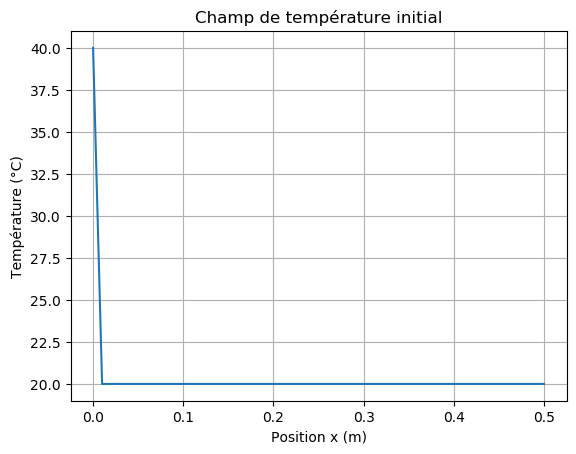

In [4]:
plt.close()
plt.figure()
plt.plot(x,T[0,:])
plt.grid()
plt.xlabel("Position x (m)")
plt.ylabel("Température (°C)")
plt.title("Champ de température initial")
plt.show()

### Itérations

>**Question 6**
>
> Remplir le tableau ```T``` de manière à imposer, à tout instant, les conditions aux limites aux deux extrémités de la barre.

In [5]:
for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tg
    T[i,-1]=Td

Il s'agit donc désormais de résoudre l'équation :
$$\frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2}$$

>**Question 7**
>
> En utilisant l'approximation de la dérivée, exprimer $\left(\frac{\partial T}{\partial t}\right)_{i,j}$ en fonction de `T[i,j]` et de la température de cases voisines du tableau dont une d'indice i+1.

$$\left(\frac{\partial T}{\partial t}\right)_{i,j} \simeq \frac{T[i+1,j]-T[i,j]}{dt}$$

>**Question 8**
>
>  Soit une fonction $f$. En écrivant la formule de Taylor à l’ordre 2 pour $f(x+dx)$ et $f(x-dx)$, démontrer que : 
> $$ f''(x)\simeq\frac{f(x+dx)+f(x-dx)-2f(x)}{dx^2}$$

>**Question 9**
>
> En déduire l'approximation de $\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j}$ en fonction de `T[i,j]` et de la température de cases voisines du tableau.

$$\left(\frac{\partial^2 T}{\partial x^2}\right)_{i,j} \simeq \frac{T[i,j+1]+T[i,j-1]-2T[i,j]}{dx^2}$$

> **Question 10**
>
> En déduire que la résolution de l'équation de diffusion thermique dans la barre se ramène au schéma numérique :
> $$ T[i+1,j]=T[i,j]+\frac{D dt}{dx^2} \left( T[i,j+1]+T[i,j-1]-2T[i,j]\right)$$

On peut montrer qu'un tel schéma numérique converge si $\frac{D dt}{dx^2}<\frac{1}{2}$ [1]. Avec les valeurs de $dx$ et de $dt$ choisies, cette condition est respectée pour un matériau de coefficient de diffusivité thermique usuelle $D=1.10^{-4} m^2.s^{-1}$. On adoptera donc cette valeur de $D$ pour la suite.

>**Question 11**
>
> Implémenter ce schéma numérique pour réaliser le remplissage du tableau ```T``` dans son intégralité.

In [6]:
D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+D*dt/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])

>**Question 12**
>
> A l'aide de la fonction ```plt.imshow```, visualiser le tableau ```T``` et commenter. On pourra utiliser l'argument ```aspect="auto"``` pour obtenir une image lisible.

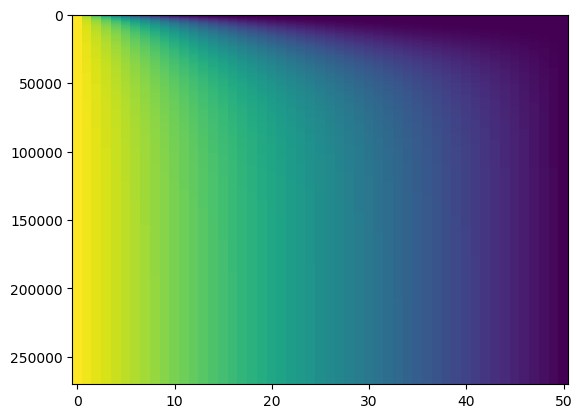

In [7]:
plt.close()
plt.figure()
plt.imshow(T,aspect="auto")
plt.show()

>**Question 13**
>
>Pour différents instants bien choisis, tracer sur un même graphique l'évolution de la température au sein de la barre. Quand est atteint le régime permanent ? Commenter.

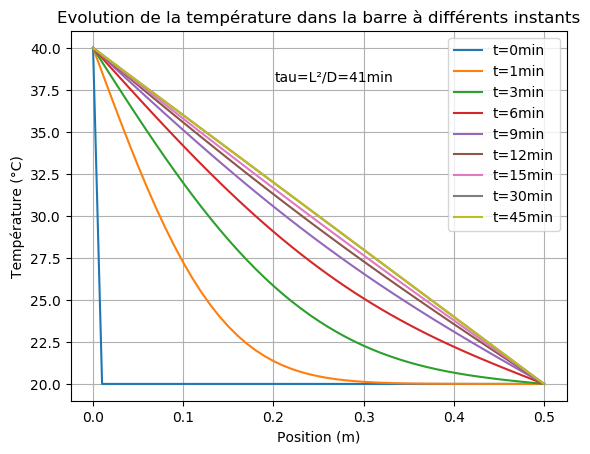

In [8]:
instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes

plt.close()
plt.figure()
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    plt.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
plt.xlabel("Position (m)")
plt.ylabel("Température (°C)")
plt.title("Evolution de la température dans la barre à différents instants")
plt.legend()
plt.grid()

tau_min=L*L/D*1/60

plt.text(0.201,38,"tau=L²/D="+str(tau_min)[0:2]+"min")

plt.show()

## Pour aller plus loin

### Puissance volumique interne dans tout le conducteur

>**Question 14**
>
>En s'inspirant de l'étude précédente, simuler la montée en température d'un barreau métallique calorifugé, de résistance $R$, maintenu à une température égale à ses deux extrémités, et parcouru par un courant électrique $I$. 
>
>*On prendra ici des valeurs arbitraires pour R et I*.

L'équation à résoudre est désormais :
$$ \frac{\partial T}{\partial t} = D \frac{\partial^2 T}{\partial x^2} + K$$ avec $K=\frac{p_V}{\rho c}$.

$p_V=\frac{RI^2}{SL}$ est la puissance volumique dissipée par effet Joule ($S$ étant la section du barreau), $\rho$ la masse volumique du barreau et $c$ la capacité thermique massique du barreau.

Le schéma numérique associé à cette équation devient alors :
$$ T[i+1,j]=T[i,j]+dt\times \left(\frac{D}{dx^2} ( T[i,j+1]+T[i,j-1]-2T[i,j]) + K\right)  $$


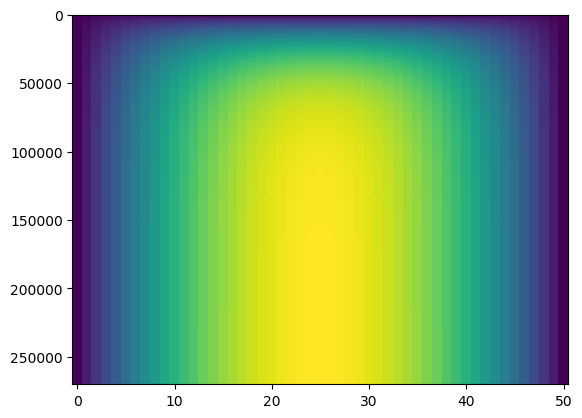

In [9]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))

Tlim=20

#initialisation

T[0,0]=Tlim
for j in range(1,Nx):
    T[0,j]=Tlim
    
#instants ultérieurs

for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tlim
    T[i,-1]=Tlim
    
K=1 #K est choisie arbitrairement de manière à avoir des résultats graphiques adaptés.
D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+dt*(D/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])+K) 
        
plt.close()
plt.figure()
plt.imshow(T,aspect="auto")
plt.show()

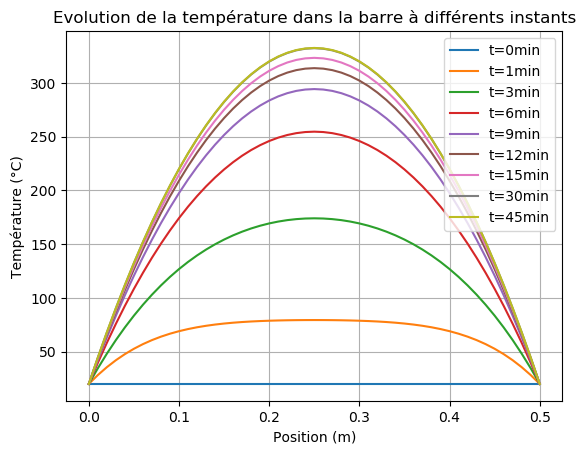

In [10]:
instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes

plt.close()
plt.figure()
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    plt.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
plt.xlabel("Position (m)")
plt.ylabel("Température (°C)")
plt.title("Evolution de la température dans la barre à différents instants")
plt.legend()
plt.grid()

plt.show()

### Puissance volumique interne dans une zone du conducteur

Enfin, pour terminer, on peut étudier le cas où seule une partie du barreau conducteur est soumis à une puissance thermique volumique interne (courant ne circulant que dans une seule zone, ou encore si une portion du matériau est radioactive, etc...). Dans ce cas, la valeur de $K$ dépend de l'indice $j$ de la colonne considérée.

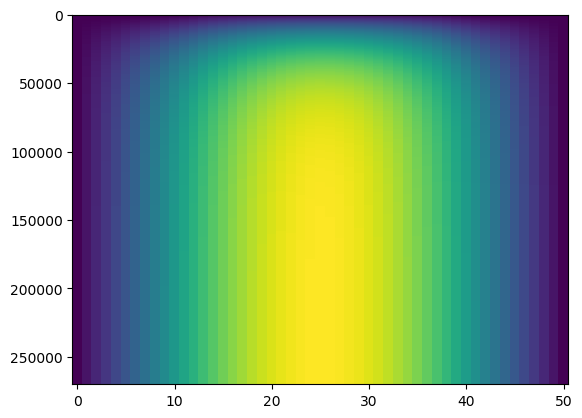

In [11]:
dx=1e-2
dt=1e-2

L=0.5
Deltat=45*60

Nx=int(L/dx)+1
Nt=int(Deltat/dt)+1

x=[j*dx for j in range(Nx)]
t=[i*dt for i in range(Nt)]

T=np.zeros((Nt,Nx))

Tlim=20

#initialisation

T[0,0]=Tlim
for j in range(1,Nx):
    T[0,j]=Tlim
    
#instants ultérieurs

for i in range (1,Nt): # l'instant initial a déjà été traité
    T[i,0]=Tlim
    T[i,-1]=Tlim

def K(j):
    if j>Nx/4 and j<3*Nx/4 :
        return 1
    else : return 0

D=1e-4

for i in range(0,Nt-1): #on remplit à l'indice i+1
    for j in range(1,Nx-1): #les conditions aux limites sont déjà fixées
        T[i+1,j]=T[i,j]+dt*(D/(dx*dx)*(T[i,j+1]+T[i,j-1]-2*T[i,j])+K(j)) 
        
plt.close()
plt.figure()
plt.imshow(T,aspect="auto")
plt.show()

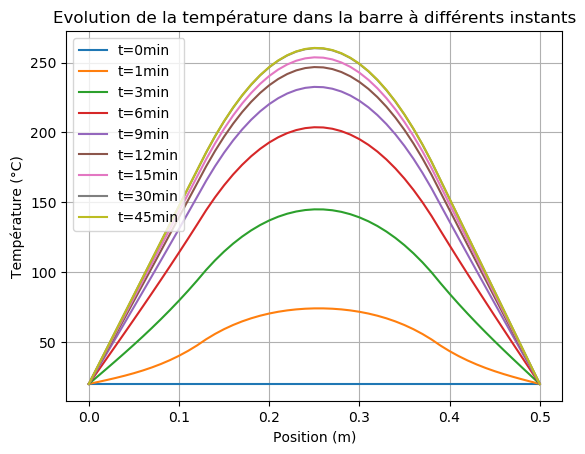

In [12]:
instants_min=[0,1,3,6,9,12,15,30,45] #instants choisis en minutes

plt.close()
plt.figure()
for k in range(len(instants_min)):
    i=int(instants_min[k]*60/dt)
    plt.plot(x,T[i,:],label="t="+str(instants_min[k])+"min")
plt.xlabel("Position (m)")
plt.ylabel("Température (°C)")
plt.title("Evolution de la température dans la barre à différents instants")
plt.legend()
plt.grid()

plt.show()

## Bibliographie

* **[1]** : *1001 codes Python pour la modélisation* - Lionel Uhl - éditions Ellipses.